___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 10 Part -1<br><br>Univariate Time Series Forecasting with RNN<br><br>RSCCASN<br><h1>

# Data Info

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data¶

In [3]:
df = pd.read_csv('RSCCASN.csv', #satis miktari datasi
                index_col='DATE',
                parse_dates=True  
                )

In [4]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [6]:
df.columns = ['Sales']

<AxesSubplot:xlabel='DATE'>

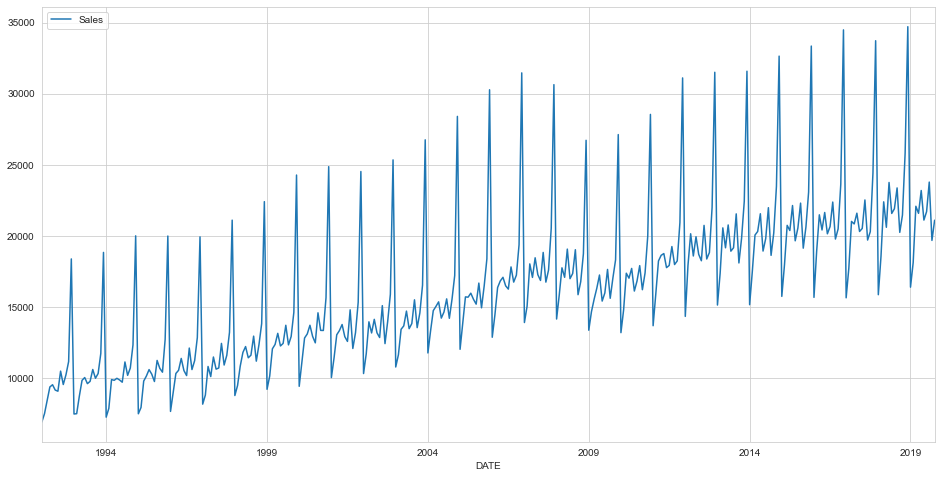

In [6]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [7]:
len(df) 

334

In [8]:
test_size = 24 #istegimize gore aldik.

In [11]:
test_ind = len(df)- test_size
test_ind

310

In [12]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [13]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-06-01,20322
2017-07-01,20535
2017-08-01,22536


In [12]:
test

,Sales
DATE,
2017-11-01,24438
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919


## Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
# help(TimeseriesGenerator)

In [18]:
length = 12 #bunlar season lik data oldugu icin 12 almak daha mantikli. 6 olmaz 24 de olabilir 
batch_size = 1 #update i etkiledigi icin onemli
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [23]:
len(generator) #son 12 yi isleyemedigi icin sayisi dusuyo

298

In [24]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [25]:
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.02127505 0.05580163 0.08942056 0.09512053 0.08146965
 0.07860151 0.12979233 0.09566512 0.1203892  0.15426227 0.41595266]
Predict this y: 
 [[0.02047633]]


# Modelling

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [28]:
train_scaled.shape

(310, 1)

In [29]:
n_features = train_scaled.shape[1]

In [30]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) ##return_sequence
model.add(LSTM(50, activation = 'tanh'))                                        #eger daha arkasindan bir layer daha  
                                                                                #gelecekse kullanilir.LSTM gelecekse
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

2022-06-30 14:32:05.362897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [31]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [32]:
4 * ((100+1)*50+(50**2))

30200

## EarlyStopping and Validation Generator

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [ ]:
## earliystopping varsa validation da olmak zorunda

In [35]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [36]:
len(validation_generator)

12

In [37]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
298/298 [==============================] - 4s 6ms/step - loss: 0.0230 - val_loss: 0.0378
Epoch 2/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0188 - val_loss: 0.0279
Epoch 3/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0183 - val_loss: 0.0242
Epoch 4/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0169 - val_loss: 0.0256
Epoch 5/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0162 - val_loss: 0.0466
Epoch 6/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0173 - val_loss: 0.0219
Epoch 7/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0148 - val_loss: 0.0215
Epoch 8/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0136 - val_loss: 0.0203
Epoch 9/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0128 - val_loss: 0.0187
Epoch 10/120
298/298 [==============================] - 1s 5ms/step - loss: 0.0112 - val_lo

<AxesSubplot:>

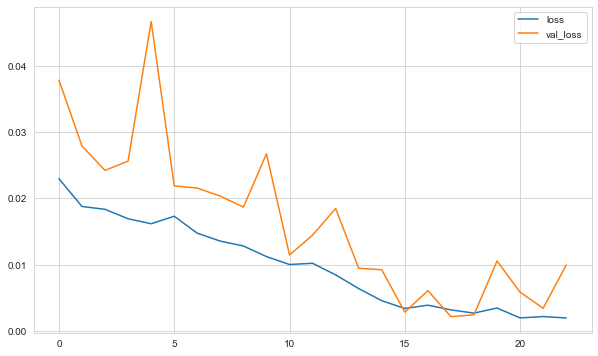

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

# Evaluation on Test Data

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [40]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [41]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 11ms/step


In [42]:
predictions_scaled

[array([0.65662366], dtype=float32),
 array([0.9191272], dtype=float32),
 array([0.35973978], dtype=float32),
 array([0.44268978], dtype=float32),
 array([0.52957517], dtype=float32),
 array([0.5245991], dtype=float32),
 array([0.5280667], dtype=float32),
 array([0.49136066], dtype=float32),
 array([0.49872452], dtype=float32),
 array([0.515976], dtype=float32),
 array([0.46069002], dtype=float32),
 array([0.5120728], dtype=float32)]

In [43]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.9074945834779444 
mae: 0.03978743761278721 
mse: 0.002048756815572998 
rmse: 0.04526319493333406


## Inverse Transformation and Comparing

In [44]:
predictions = scaler.inverse_transform(predictions_scaled)

In [45]:
compare = test[:12]

In [46]:
compare['Predictions'] = predictions

In [47]:
compare

,Sales,Predictions
DATE,,
2017-11-01,24438,25024.042
2017-12-01,33720,32254.440
2018-01-01,15881,16846.673
2018-02-01,18585,19131.447
2018-03-01,22404,21524.618
2018-04-01,20616,21387.557
2018-05-01,23764,21483.069
2018-06-01,21589,20472.038
2018-07-01,21919,20674.868


<AxesSubplot:xlabel='DATE'>

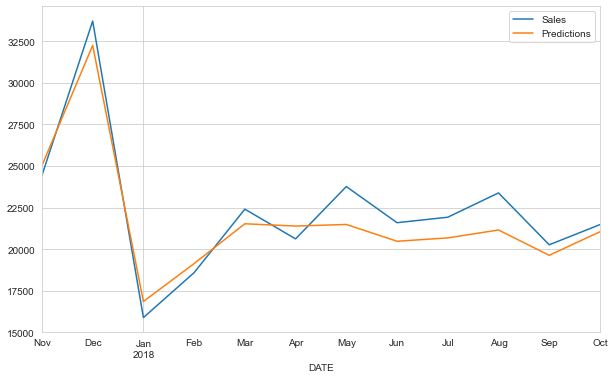

In [48]:
compare.plot()

In [49]:
eval_metrics(compare.Sales, compare.Predictions)

r2_score: 0.9074945834779442 
mae: 1095.905181606612 
mse: 1554334.2996639654 
rmse: 1246.729441243755


# Retrain and Forecasting

In [50]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [51]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [52]:
len(df)

334

In [53]:
len(generator)

322

In [54]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
322/322 [==============================] - 4s 5ms/step - loss: 0.0230
Epoch 2/15
322/322 [==============================] - 2s 5ms/step - loss: 0.0198
Epoch 3/15
322/322 [==============================] - 1s 5ms/step - loss: 0.0200
Epoch 4/15
322/322 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 5/15
322/322 [==============================] - 1s 5ms/step - loss: 0.0178
Epoch 6/15
322/322 [==============================] - 1s 5ms/step - loss: 0.0164
Epoch 7/15
322/322 [==============================] - 1s 5ms/step - loss: 0.0155
Epoch 8/15
322/322 [==============================] - 1s 5ms/step - loss: 0.0169
Epoch 9/15
322/322 [==============================] - 2s 5ms/step - loss: 0.0134
Epoch 10/15
322/322 [==============================] - 2s 5ms/step - loss: 0.0108
Epoch 11/15
322/322 [==============================] - 2s 5ms/step - loss: 0.0080
Epoch 12/15
322/322 [==============================] - 2s 5ms/step - loss: 0.0061
Epoch 13/15
322/322 [====

In [55]:
scaled_full_data.shape

(334, 1)

In [56]:
scaled_full_data[-length:].shape

(12, 1)

In [57]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 10ms/step


In [58]:
forecast = scaler.inverse_transform(forecast)

In [59]:
forecast

array([[29952.91976643],
       [33314.04567719],
       [17404.27413344],
       [19010.34677172],
       [21339.22051716],
       [21248.9242487 ],
       [21501.12993526],
       [20141.42984462],
       [20155.94948459],
       [20095.15793228],
       [19584.51940012],
       [22704.92695141]])

In [60]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [61]:
forecast_index = pd.date_range(start = '2019-11-01', periods = length, freq = 'MS')

https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [62]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [63]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [64]:
forecast_df

,Forecast
2019-11-01,29952.920
2019-12-01,33314.046
2020-01-01,17404.274
2020-02-01,19010.347
2020-03-01,21339.221
2020-04-01,21248.924
2020-05-01,21501.130
2020-06-01,20141.430
2020-07-01,20155.949
2020-08-01,20095.158


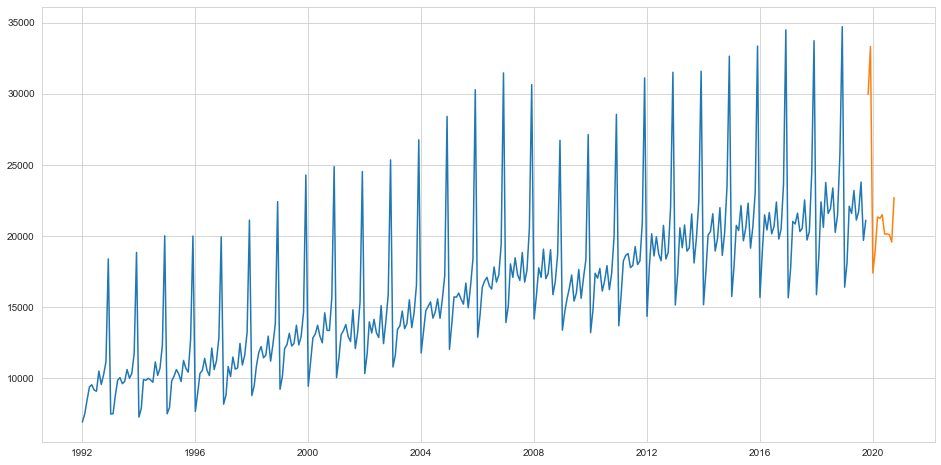

In [65]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Sales'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

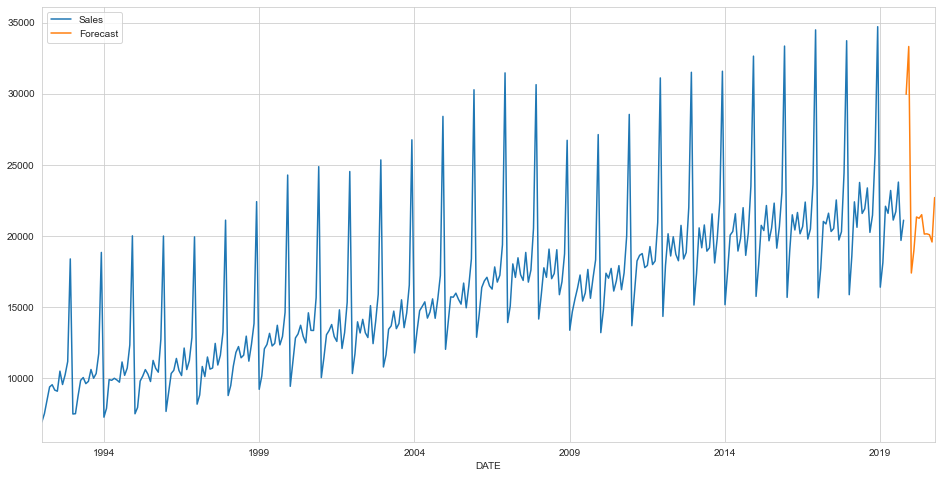

In [66]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

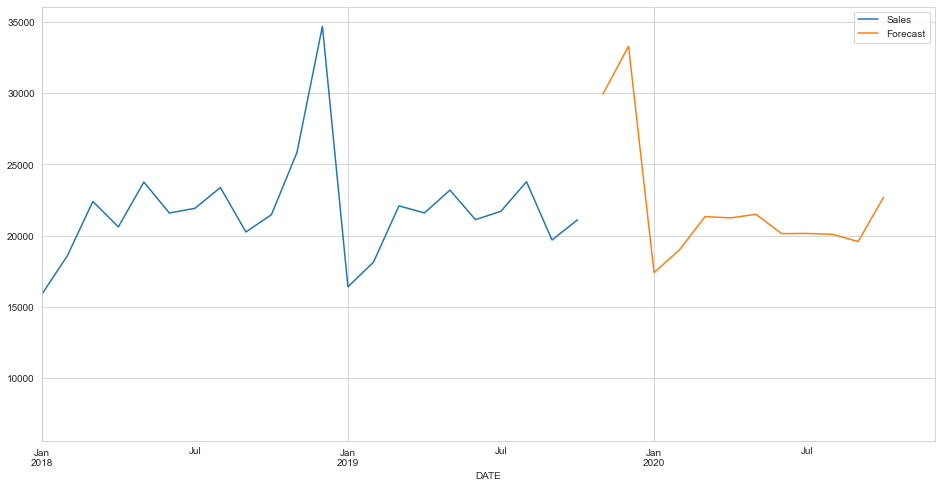

In [67]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [68]:
dataset_total = pd.concat((df['Sales'], forecast_df['Forecast']), axis=0)#datamiz ile predict datamizi birlestirdik.

<AxesSubplot:>

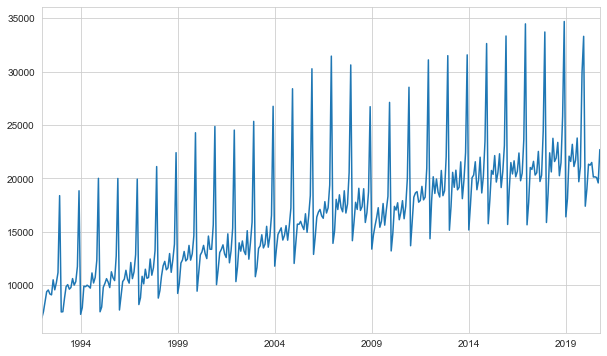

In [69]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___